In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
import pickle

In [5]:
df=pd.read_csv('diabetes.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [6]:
#lets describe the data
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [7]:
#infromation of dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [8]:
#any null values 
#not neccessary in above information we can see
df.isnull().values.any()

False

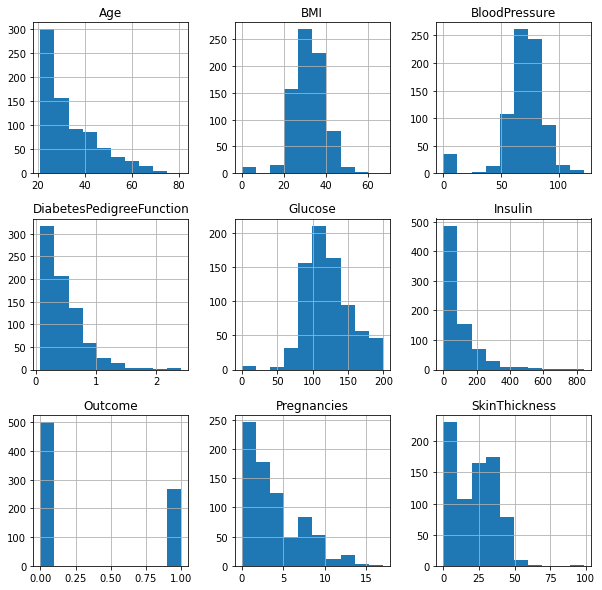

In [9]:
#histogram
df.hist(bins=10,figsize=(10,10))
plt.show()

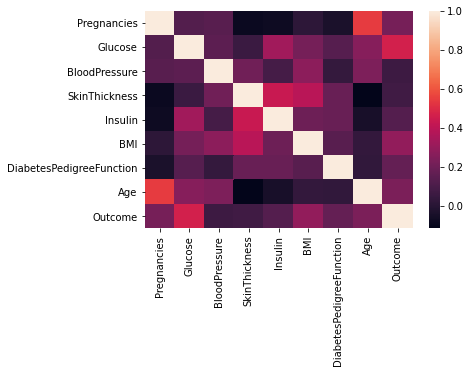

In [10]:
#correlation

sns.heatmap(df.corr())
# we can see skin thickness,insulin,pregnencies and age are full independent to each other
#age and pregencies has negative correlation

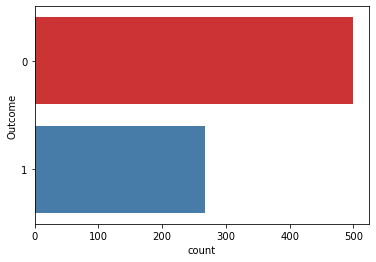

In [11]:
#lets count total outcome in each target 0 1
#0 means no diabeted
#1 means patient with diabtes
sns.countplot(y=df['Outcome'],palette='Set1')

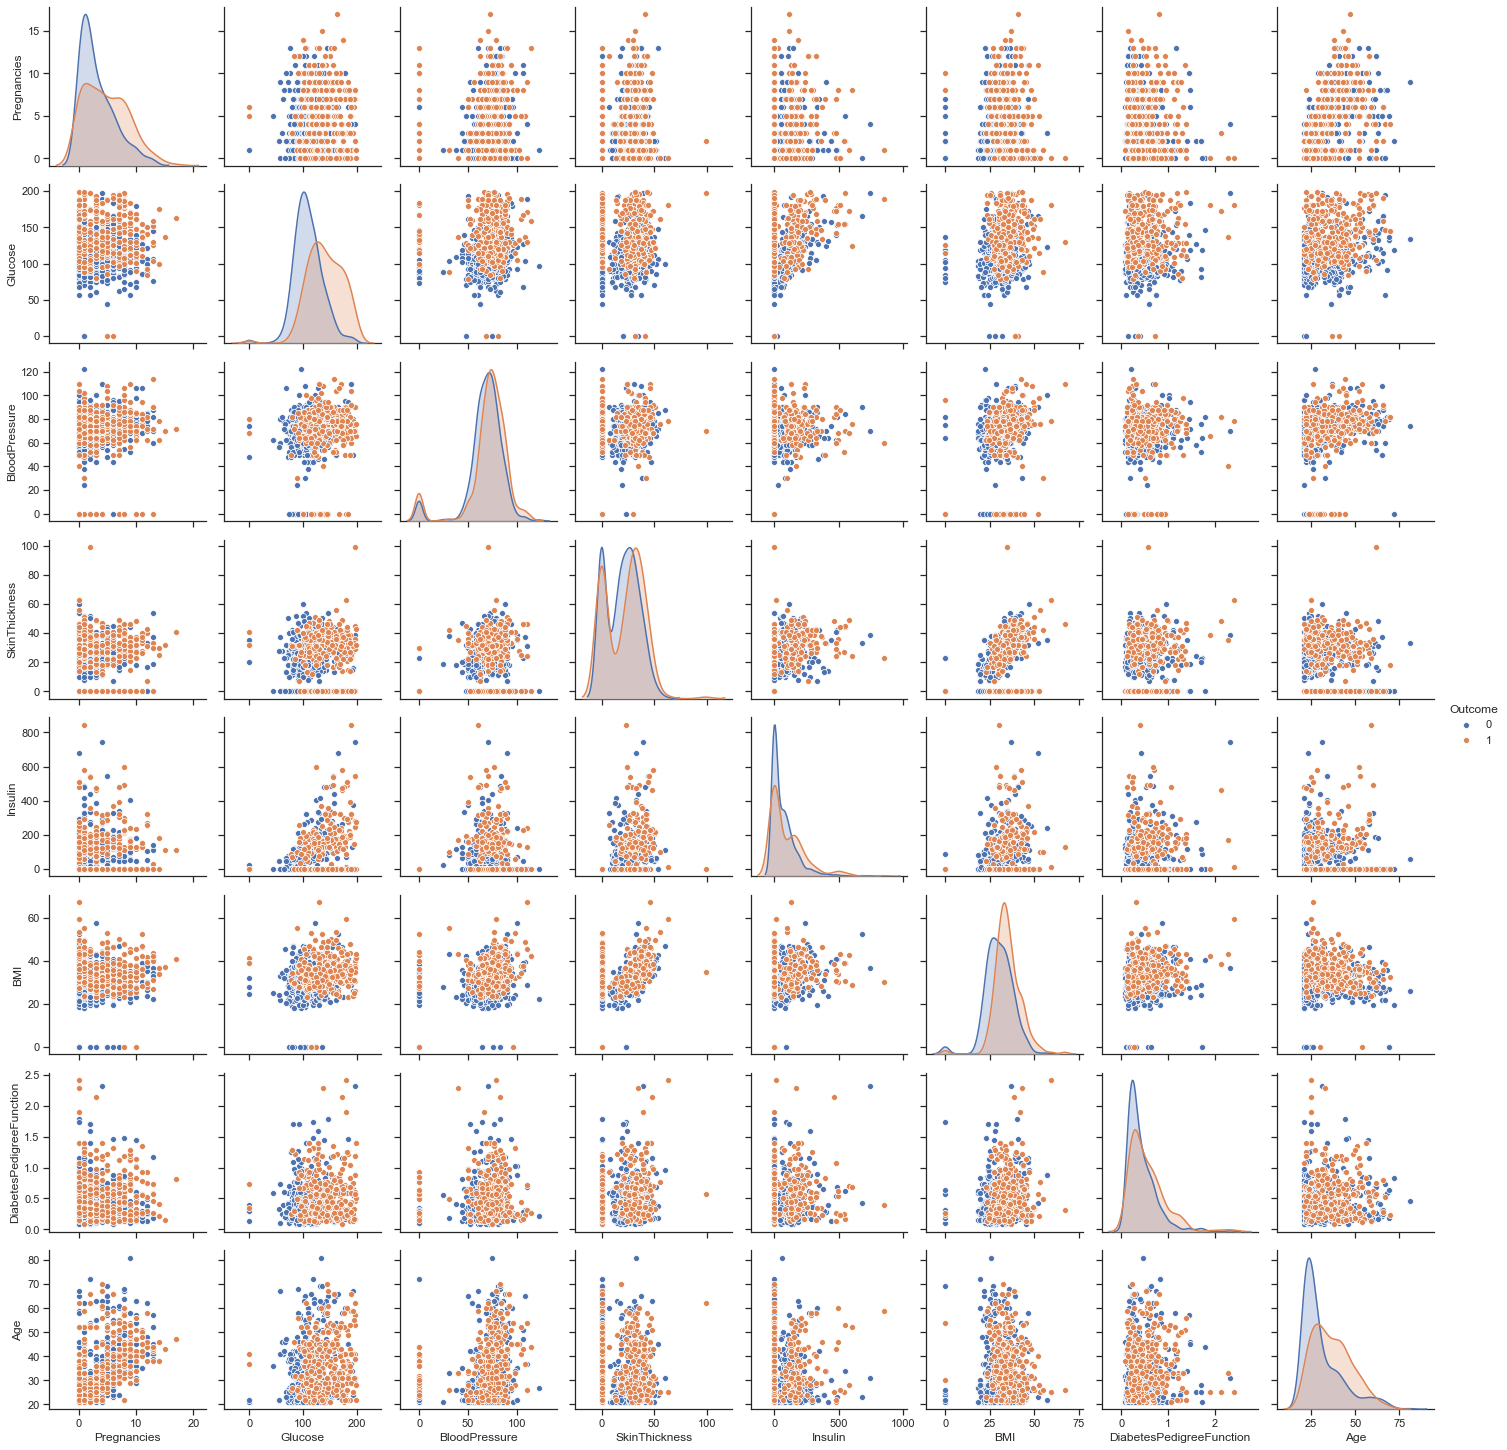

In [12]:
sns.set(style="ticks")
sns.pairplot(df, hue="Outcome")

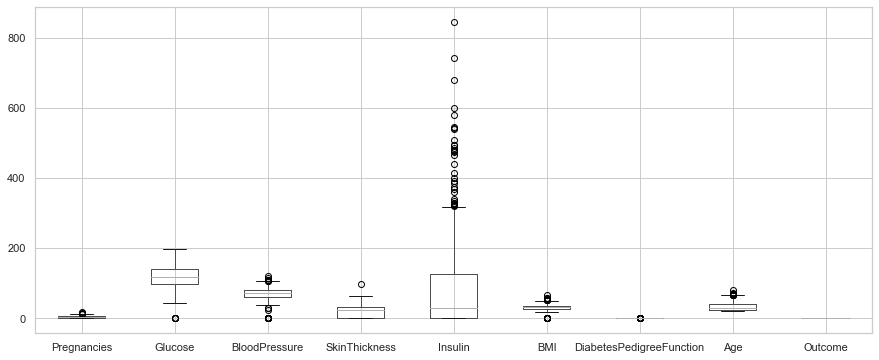

In [13]:
#box plot for outlier visualization
sns.set(style="whitegrid")
df.boxplot(figsize=(15,6))

In [14]:
#defining dependent and independent variable 
X = df.iloc[:,[0,1,2,3,4, 5, 7]].values
y = df.iloc[:,8].values

In [15]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)


In [16]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((614, 7), (154, 7), (614,), (154,))

In [17]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [18]:
from sklearn.metrics import confusion_matrix,accuracy_score,make_scorer

In [19]:
# Fitting Logistic Regression to the Training set
from sklearn.linear_model import LogisticRegression
model1 = LogisticRegression()
model1.fit(X_train, y_train)
y_pred = model1.predict(X_test)
# Checking Accuracy
acc=[]
ac=accuracy_score(y_test,y_pred)
acc.append(ac)

print("\nAccuracy {0} ".format(ac))



Accuracy 0.8116883116883117 


In [20]:
#Support Vector Machine
from sklearn.svm import SVC

model2=SVC(kernel='linear')
model2.fit(X_train, y_train)
y_pred=model2.predict(X_test)
#find accuracy
ac=accuracy_score(y_test,y_pred)
acc.append(ac)


print("\nAccuracy {0} ".format(ac))




Accuracy 0.8246753246753247 


In [21]:
#Decision Tree
from sklearn.tree import DecisionTreeClassifier 

model3=DecisionTreeClassifier()
model3.fit(X_train,y_train)

y_pred=model3.predict(X_test)
#find accuracy
ac=accuracy_score(y_test,y_pred)
acc.append(ac)

print("\nAccuracy {0}".format(ac))


Accuracy 0.7207792207792207


In [22]:
#Random forest
from sklearn.ensemble import RandomForestClassifier

model4=RandomForestClassifier()
model4.fit(X_train,y_train)

y_pred=model4.predict(X_test)
#find accuracy
ac=accuracy_score(y_test,y_pred)
acc.append(ac)


print("\nAccuracy {0}".format(ac))



Accuracy 0.8441558441558441


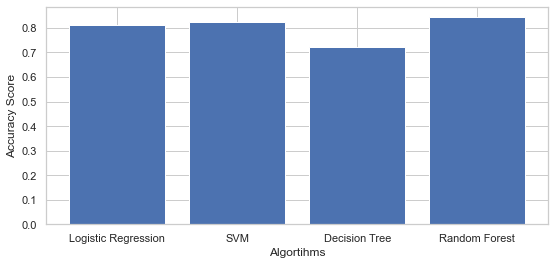

In [23]:
#lets plot the bar graph

ax=plt.figure(figsize=(9,4))
plt.bar(['Logistic Regression','SVM','Decision Tree','Random Forest'],acc,label='Accuracy')
plt.ylabel('Accuracy Score')
plt.xlabel('Algortihms')
plt.show()

In [25]:
#
MODEL= 'my_model.pkl'
pickle.dump(model4, open(MODEL,'wb'))
